## Moonboard Sequence Simulator

In [1]:
import numpy as np
import os
import copy
import pickle
import heapq
import matplotlib.pyplot as plt
import pandas as pd
from preprocessing_helper import *

In [2]:
cwd = os.getcwd()
parent_wd = cwd.replace('/preprocessing', '')
raw_data_path = parent_wd + '/preprocessing/processed_data_xy_mode'  
url_data_path = parent_wd + '/raw_data/moonGen_scrape_2016_cp'
left_hold_feature_path = parent_wd + '/raw_data/HoldFeature2016LeftHand.csv'
right_hold_feature_path = parent_wd + '/raw_data/HoldFeature2016RightHand.csv'

## 1. Read all preprocessed data


### 1-1. Read hand feature files

In [3]:
LeftHandfeatures = pd.read_csv(left_hold_feature_path, dtype=str)
RightHandfeatures = pd.read_csv(right_hold_feature_path, dtype=str)

# convert features from pd dataframe to dictionary of left and right hand
RightHandfeature_dict = {}
LeftHandfeature_dict = {}
for index in RightHandfeatures.index:
    LeftHandfeature_item = LeftHandfeatures.loc[index]
    LeftHandfeature_dict[(int(LeftHandfeature_item['X_coord']), int(LeftHandfeature_item['Y_coord']))] = np.array(
        list(LeftHandfeature_item['Difficulties'])).astype(int)
    RightHandfeature_item = RightHandfeatures.loc[index]
    RightHandfeature_dict[(int(RightHandfeature_item['X_coord']), int(RightHandfeature_item['Y_coord']))] = np.array(
        list(RightHandfeature_item['Difficulties'])).astype(int)

### 1-2. Read moonboard problems with url file

In [4]:
with open(url_data_path, 'rb') as f:
    MoonBoard_2016_withurl = pickle.load(f)

### 1-3. Read preprocessed moonboard problem

In [5]:
with open(raw_data_path, 'rb') as f:
    MoonBoard_2016_raw = pickle.load(f)  

#### Here you can see the possible range of next right hand using sum of two Gaussisan. Remaining left hand in origin

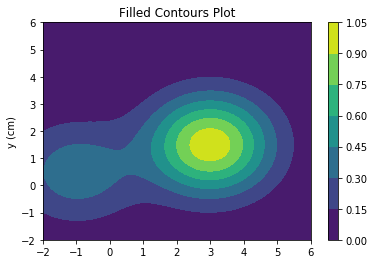

In [6]:
xlist = np.linspace(-2,6, 100)
ylist = np.linspace(-2,6, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = makeGaussian((X,Y), 3, (0,0))
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_ylabel('y (cm)')
plt.show()

## 2. Demonstration of detailed analysis on a single problem

### 2-1. load one specific problem

In [7]:
keyNum = "342797"    
moonboardTest = (MoonBoard_2016_raw["X_dict_withgrade"])[keyNum]

In [8]:
testbeta = beta(moonboardTest.T)
status = [beta(moonboardTest.T), beta(moonboardTest.T)]
print("keyNum = ", keyNum)
print(status[0].allHolds)
moonboardTestUrl = MoonBoard_2016_withurl[keyNum]
print(moonboardTestUrl["url"])
# Initialized Start hold of two different beta
status[0].addStartHolds(0)
status[1].addStartHolds(1)

operationList = ["RH", "LH"]
tempstatus = []
tempstatus2 = []
tempstatus3 = []
distanceScore = []

keyNum =  342797
[[ 5.  4.  9.  4.  1.  1.  5.  4.  1.  0.]
 [ 0.  2.  4.  2.  0.  0.  4.  7.  0.  0.]
 [ 1.  5.  2.  0.  0.  0.  0.  8.  0.  0.]
 [ 0.  0.  4.  9.  4.  0.  7.  9.  0.  0.]
 [ 0.  0.  6.  4.  4.  0.  3. 11.  0.  0.]
 [ 0.  3.  6.  3.  0.  0.  4. 12.  0.  0.]
 [ 1.  4.  3.  1.  0.  0.  2. 14.  0.  0.]
 [ 2.  5.  2.  1.  0.  0.  1. 15.  0.  0.]
 [ 2.  6.  8.  6.  2.  0.  3. 17.  0.  1.]]
https://moonboard.com/Problems/View/342797/chats


### 2-2. Beamer search process 

In [9]:
# Run the algorithm for 6 times
totalRun = status[0].totalNumOfHold - 1
for i in range(totalRun):  # how many new move you wan to add
    print (i)
    status = addNewBeta(status)
    finalScore = [] 
    for i in status:   
        finalScore.append(i.overallSuccessRate())
    largestIndex = heapq.nlargest(4, range(len(finalScore)), key=finalScore.__getitem__)
    if (status[largestIndex[0]].isFinished and status[largestIndex[1]].isFinished) == True:
        break

0
[0, 0, 1] ['LH', 'RH', 'LH'] [147.09694124]
[0, 0, 1] ['LH', 'RH', 'LH'] [147.09694124]
[0, 0, 1] ['LH', 'RH', 'RH'] [92.60035394]
[0, 0, 1] ['LH', 'RH', 'RH'] [92.60035394]
[0, 0, 2] ['LH', 'RH', 'LH'] [65.32602493]
[0, 0, 2] ['LH', 'RH', 'LH'] [65.32602493]
[0, 0, 3] ['LH', 'RH', 'RH'] [54.2957249]
[0, 0, 3] ['LH', 'RH', 'RH'] [54.2957249]
1
[0, 0, 1, 3] ['LH', 'RH', 'LH', 'RH'] [207.39931721]
[0, 0, 1, 3] ['LH', 'RH', 'LH', 'RH'] [207.39931721]
[0, 0, 1, 2] ['LH', 'RH', 'RH', 'LH'] [106.39664984]
[0, 0, 1, 2] ['LH', 'RH', 'RH', 'LH'] [106.39664984]
[0, 0, 2, 4] ['LH', 'RH', 'LH', 'RH'] [58.83563347]
[0, 0, 2, 4] ['LH', 'RH', 'LH', 'RH'] [58.83563347]
[0, 0, 3, 4] ['LH', 'RH', 'RH', 'LH'] [57.45155419]
[0, 0, 3, 4] ['LH', 'RH', 'RH', 'LH'] [57.45155419]
2
[0, 0, 1, 3, 4] ['LH', 'RH', 'LH', 'RH', 'LH'] [165.96935332]
[0, 0, 1, 3, 4] ['LH', 'RH', 'LH', 'RH', 'LH'] [165.96935332]
[0, 0, 1, 3, 5] ['LH', 'RH', 'LH', 'RH', 'LH'] [151.39323371]
[0, 0, 1, 3, 5] ['LH', 'RH', 'LH', 'RH', 'LH

In [10]:
# last sorting for the best 5
finalScore = [] 
print(status)
for i in status:   
    finalScore.append(i.overallSuccessRate())   
largestIndex = heapq.nlargest(4, range(len(finalScore)), key=finalScore.__getitem__)

[<preprocessing_helper.beta object at 0x126e17ad0>, <preprocessing_helper.beta object at 0x126e17f50>, <preprocessing_helper.beta object at 0x126e17950>, <preprocessing_helper.beta object at 0x126e171d0>, <preprocessing_helper.beta object at 0x126e25cd0>, <preprocessing_helper.beta object at 0x126e25150>, <preprocessing_helper.beta object at 0x126e25650>, <preprocessing_helper.beta object at 0x126e256d0>]


In [11]:
print(moonboardTestUrl["url"])
print ("After Beamer search, the most possible hand sequence and the successRate:")
for i in largestIndex:
    print(status[i].handSequence, status[i].handOperator, status[i].overallSuccessRate())    

https://moonboard.com/Problems/View/342797/chats
After Beamer search, the most possible hand sequence and the successRate:
[0, 0, 1, 3, 4, 5, 7, 8] ['LH', 'RH', 'LH', 'RH', 'LH', 'RH', 'LH', 'RH'] [98.50396893]
[0, 0, 1, 3, 4, 5, 7, 8] ['LH', 'RH', 'LH', 'RH', 'LH', 'RH', 'LH', 'RH'] [98.50396893]
[0, 0, 1, 3, 4, 5, 7, 8] ['LH', 'RH', 'LH', 'RH', 'LH', 'RH', 'LH', 'RH'] [98.50396893]
[0, 0, 1, 3, 4, 5, 7, 8] ['LH', 'RH', 'LH', 'RH', 'LH', 'RH', 'LH', 'RH'] [98.50396893]


### 2-3. Here you can find one problem's best hand sequence. Feel free to change key to see other result

To find other keys, try MoonBoard_2016_raw["X_dict_benchmark_withgrade"].keys()

In [12]:
produce_sequence("20149", MoonBoard_2016_raw["X_dict_benchmark_withgrade"], n_return = 1, printout = True)

https://moonboard.com/Problems/View/20149/ladybug
After Beamer search, the most possible hand sequence and the successRate:
['J5', 'G6', 'A9', 'F11', 'C13', 'A14', 'D18']
[0, 1, 2, 4, 5, 6, 7] ['LH', 'RH', 'LH', 'RH', 'LH', 'LH', 'RH'] [6.55920813]


{0: <preprocessing_helper.beta at 0x126e257d0>}

#### I check the hand sequence of 20 problem. 90% are exactly same with human's prediction. Other 10% are acceptable sequence. Next we will start generate move sequence

## 3. Process the entire dataset and save the results

In [22]:
save_path = cwd + '/benchmark_withgrade_move_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_benchmark_withgrade"]
output, fail_list = moveGeneratorForAllProblem(processed_data, save_path, print_result = False)
print(fail_list)

result saved.
[]


In [23]:
save_path = cwd + '/benchmark_withgrade_move_seq_Y'
processed_data_Y = MoonBoard_2016_raw["Y_dict_benchmark_withgrade"]
output, fail_list = gradeTransFromFontToV(processed_data_Y, save_path)
print(fail_list)

result saved.
[]


In [24]:
save_path = cwd + '/benchmark_nograde_move_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_benchmark_nograde"]
output, fail_list = moveGeneratorForAllProblem(processed_data, save_path, print_result = False)
print(fail_list)

result saved.
[]


In [25]:
save_path = cwd + '/benchmark_nograde_move_seq_Y'
processed_data_Y = MoonBoard_2016_raw["Y_dict_benchmark_nograde"]
output, fail_list = gradeTransFromFontToV(processed_data_Y, save_path)
print(fail_list)

result saved.
[]


In [26]:
save_path = cwd + '/nonbenchmark_withgrade_move_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_withgrade"]
output, fail_list = moveGeneratorForAllProblem(processed_data, save_path, print_result = False)
print(fail_list)

Raw data with key 19362 contains error
result saved.
['19362']


In [27]:
save_path = cwd + '/nonbenchmark_withgrade_move_seq_Y'
processed_data_Y = MoonBoard_2016_raw["Y_dict_withgrade"]
output, fail_list = gradeTransFromFontToV(processed_data_Y, save_path)
print(fail_list)

result saved.
[]


In [28]:
save_path = cwd + '/nonbenchmark_nograde_move_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_nograde"]
output, fail_list = moveGeneratorForAllProblem(processed_data, save_path, print_result = False)
print(fail_list)

result saved.
[]


In [29]:
save_path = cwd + '/nonbenchmark_nograde_move_seq_Y'
processed_data_Y = MoonBoard_2016_raw["Y_dict_nograde"]
output, fail_list = gradeTransFromFontToV(processed_data_Y, save_path)
print(fail_list)

key 363336 failed.
key 363335 failed.
key 350368 failed.
key 349610 failed.
key 349049 failed.
key 348915 failed.
key 348858 failed.
key 348670 failed.
key 348669 failed.
key 348432 failed.
key 346738 failed.
key 344743 failed.
key 339916 failed.
key 339325 failed.
key 337916 failed.
key 335566 failed.
key 312004 failed.
key 310949 failed.
key 309657 failed.
key 309311 failed.
key 248997 failed.
key 246092 failed.
key 231401 failed.
key 231392 failed.
result saved.
['363336', '363335', '350368', '349610', '349049', '348915', '348858', '348670', '348669', '348432', '346738', '344743', '339916', '339325', '337916', '335566', '312004', '310949', '309657', '309311', '248997', '246092', '231401', '231392']
